<a href="https://colab.research.google.com/github/ssalazara/MACI_Analitica1/blob/main/tarea_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarea 2. Analítica de datos.

**Profesor:** Julio Erasmo Godoy Del Campo (jugodoy@inf.udec.cl).<br>
**Ayudante:** Martina Cádiz (mcadiz2018@inf.udec.cl).

**Integrante:**


**¿Cómo debe subir la tarea?:** La tarea debe ser subida a la plataforma de Canvas en un archivo con el formato **NombreApellido_tarea2.zip**. Este debe contener el Notebook.

## Objetivo

El objetivo de esta tarea es ver como funcionan los métodos de agrupación y reducción de la dimensionalidad sobre un conjunto de datos de reconocimiento de actividad humana que viene adjunto en el zip. Principalmente se quiere que el alumno aprenda a utilizar técnicas de clustering sobre un conjunto de datos, técnicas de reducción de dimensionalidad y que pueda observar experimentalmente como varian los resultados al agrupar datos considerando todas las dimensiones, como también, considerando solo las más importantes.

El dataset fue extraido desde el repositorio de datos de Machine Learning, [aquí](https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones) pueden encontrar más información del conjunto de datos a utilizar. En simples palabras, este dataset corresponde a la actividad que esta realizando cierta persona en un momento dado, la cual puede ser explicada mediante ciertos atributos de interes que fueron medidos usando un celular en la cintura. Por ejemplo, se sabe si una persona camino, se puso de pie, se acostó, se sentó, subio o bajo las escaleras.

Supondremos que no conocemos el tipo de actividad que esta realizando la persona, e intentaremos agrupar a las personas, según su tipo de actividad, únicamente en función de los atributos disponibles.

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Lectura del conjunto de datos

Se adjuntará el código de lectura para el conjunto de datos. Si se fijan el dataset tambien viene con más atributos que se podrían considerar, sin embargo, solo se usaran los que estan directamente en los archivos train y test.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import zipfile

In [ ]:
from google.colab import files

files.upload()

Saving UCI_HAR_Dataset.zip to UCI_HAR_Dataset.zip


In [ ]:
!gdown -O UCI_HAR_Dataset.zip https://drive.google.com/uc?id=1EesF7WkBRztuwMa49AVxKy_I3_g-xxvV&export=download

Access denied with the following error:

 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=1EesF7WkBRztuwMa49AVxKy_I3_g-xxvV 



Luego de acceder al link, pueden subir el archivo zip a su drive y descomprimirlo de la siguiente manera:

In [12]:
#Download and Extract Data 

zipfilename = "/content/drive/MyDrive/Colab Notebooks/tarea2_analitica/0-UCI_HAR_Dataset.zip" #acá deben poner la ubicación de su archivo zip en su drive

password = None
z = zipfile.ZipFile(zipfilename, "r")
try:
    z.extractall(pwd=password)
except:
    print('Error')
    pass
z.close()

In [13]:
path_file = 'UCI HAR Dataset'

train_path_x = 'train/X_train.txt'
train_path_y = 'train/y_train.txt'

test_path_x = 'test/X_test.txt'
test_path_y = 'test/y_test.txt'

X_train = np.loadtxt('{}/{}'.format(path_file, train_path_x))
y_train = np.loadtxt('{}/{}'.format(path_file, train_path_y)).astype(int)

X_test = np.loadtxt('{}/{}'.format(path_file, test_path_x))
y_test = np.loadtxt('{}/{}'.format(path_file, test_path_y)).astype(int)

In [14]:
print("Tamaño de los datos:\n")
print(f"X_train: {X_train.shape}")
print(f"y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_test: {y_test.shape}")

Tamaño de los datos:

X_train: (7352, 561)
y_train: (7352,)
X_test: (2947, 561)
y_test: (2947,)


Como puede darse cuenta los datos estan separados en conjunto de train y test, sin embargo, para realizar apredizaje no supervisado, no es necesario un conjunto de test con el cual comparar la agrupación, ya que esta agrupación se puede hacer con la etiqueta respectiva de cada uno de los datos (columna actividad). Por lo tanto, trabajaremos con la combinación de muestras de train y test. 

**1**. **Combine X_train con X_test e y_train con y_test. <span style="color:red">(0.5 pt)</span>** 

In [16]:
X = np.concatenate((X_train, X_test), axis=0, out=None)
y = np.concatenate((y_train, y_test), axis=0, out=None)

In [18]:
X.shape

(10299, 561)

In [19]:

y.shape

(10299,)

 **2. Defina el número de valores únicos de las etiquetas de cada clase, como también la cantidad de observaciones por clase (columna actividad). <span style="color:red">(0.5 pt)</span>**

In [21]:
np.unique(y, return_counts=True)
# imprimir mejor la frecuencia por etiqueta

(array([1, 2, 3, 4, 5, 6]), array([1722, 1544, 1406, 1777, 1906, 1944]))

In [31]:
#print(np.unique(y, return_counts=True)[0][0])

for i in range(0,6):
    print("La etiqueta numero ",np.unique(y, return_counts=True)[0][i], "tiene " ,np.unique(y, return_counts=True)[1][i], "valores unicos")

La etiqueta numero  1 tiene  1722 valores unicos
La etiqueta numero  2 tiene  1544 valores unicos
La etiqueta numero  3 tiene  1406 valores unicos
La etiqueta numero  4 tiene  1777 valores unicos
La etiqueta numero  5 tiene  1906 valores unicos
La etiqueta numero  6 tiene  1944 valores unicos


**3. Generalmente los métodos de clustering y de reducción de dimensionalidad funcionan mejor con datos escalados, por ende, escale la muestra.  <span style="color:red">(1 pt)</span>**

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
scaler = StandardScaler()

In [34]:
scaler.fit(X)

StandardScaler()

In [36]:
X_train_scaled = scaler.transform(X)

## Aplicación de algoritmo de clustering.

La idea es que aplique el algoritmo  de clustering kmeans directamente al conjunto de datos utilizado y responda las preguntas presentadas en esta sección.

 

**4. Utilice silhouette para visualizar el número de cluster "óptimos" en el métodos. <span style="color:red">(2 pts)</span>**

In [39]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

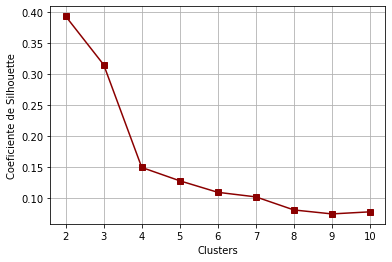

In [40]:
scores_s = []

for i in range(2, 11):
    km = KMeans(n_clusters = i, random_state = 24)
    km.fit(X_train_scaled)
    scores_s.append(silhouette_score(X_train_scaled, km.labels_))
    
# Coeficiente de Silhouette Method
plt.plot(range(2, 11), scores_s, '-s', color='darkred')
plt.xlabel('Clusters')
plt.ylabel('Coeficiente de Silhouette')
plt.grid()

plt.show()

<span style="color:red">A pesar de la cantidad de cluster "óptimos" que se hayan obtenido de la pregunta 1, para las siguientes preguntas utilice n_cluster = 6, ya que permitirá hacer la comparación directa con las etiquetas reales. 

**5. Realice el grafico de barra de los clusters formados por K-means, es decir, utilice las etiquetas en el eje "x" y la cantidad por etiqueta en el eje "y". <span style="color:red">(1 pt)</span>**

**6. Mire la correspondencia entre las marcas de grupo y las etiquetas de clase originales y diga en qué tipo de actividades se confunde el algoritmo. <span style="color:red">(2 pts)</span>**

**7. ¿Qué tipos de actividad se incluyen en cada clúster?. En otras palabras, diga cuales actividades estan incluidas en cada cluster. Luego de obtenerlas puede escribir su respuesta en "Respuesta: ...". <span style="color:red">(2 pts)</span>** 

**Por ejemplo:**

Cluster 1: sitting, laying y walking downstairs<p>
...<p>
Cluster 6: Todas las actividades



**Respuesta: ...**

## Aplicación de técnica de reducción de dimensionalidad

La idea es que aplique la técnica de reducción de dimensionalidad PCA sobre los datos entregados y luego realice el mismo procedimiento de la pregunta 1 con el fin de comparar los resultados agrupando los datos con y sin reducción de dimensionalidad.

**8. Aplique PCA sobre los datos. <span style="color:red">(2pts)</span>**

Luego de aplicar PCA y antes de realizar kmeas, responda las siguientes preguntas.

**9. ¿Cuál es el número mínimo de componentes principales necesarios para cubrir el 90 % de la varianza de los datos originales? <span style="color:red">(2 pts)</span>**

**10. ¿Qué porcentaje de la varianza cubre el primer componente principal? Redondear al porcentaje más cercano. <span style="color:red">(2 pts)</span>**

**11. Entrene el algoritmo de kmeans, pero ahora teniendo en cuenta las componentes principales que decidio dejar y número de clústers = 6. <span style="color:red">(10 pts)</span>**

**12. Evalué la agrupación mediante la métrica de silhouette. <span style="color:red">(2 pts - BONUS)</span>**

**13. Concluya las diferencias, o bien, resultados, de la utilización de PCA sobre la agrupación. ¿Porque cree usted que fue mejor o peor? <span style="color:red">(2 pts - BONUS)</span>**